# **Project-2**

In this project, you will analyze and predict the weekly sales for a retail store. The dataset includes weekly sales data for *45* store locations over a *143-week* period. Create a machine learning model (**regression**) to predict weekly sales values using the train and test datasets provided.

**Dataset Details:**

*Store*: Store number

*Week*: 1 through 143

*Temperature*: Weekly outside temperature

*Holiday*: Yes for holiday week, No for non-holiday week

*CPI*: The Consumer Price Index

*Fuel Price*: Price per gallon

*Unemployment*: Unemployment rate

*WeeklySales*: Total sales amount


**Datasets Locations and Names:**
Canvas -> Modules -> Week 5 -> Datasets -> "trainSales.csv" and "testSales.csv".

Download the .ipynb file and save as FirstName_LastName_Project2.ipynb. Please submit (upload) your source code to Canvas.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Read the data from both the training and test csv files
salesTrain = pd.read_csv("trainSales.csv")
salesTest = pd.read_csv("testSales.csv")

#Code obtained from: https://stackoverflow.com/questions/43716402/remove-row-index-dataframe-pandas

#salesTrain = salesTrain.reset_index(drop=True, inplace=True)
#salesTest = salesTest.reset_index(drop=True, inplace=True) 

"""Code above gave an attribute error after running second cell for a 'NoneType' attribute"""

"""
Code within this block were a test of different combinations of the parameters

#salesTrain = salesTrain.reset_index(drop=True)
#salesTest = salesTest.reset_index(drop=True)

#salesTrain = salesTrain.reset_index(drop=True, inplace=False) ---inplace=False is default---
#salesTest = salesTest.reset_index(drop=True, inplace=False)   ---inplace=False is default---
"""

"""Looking at stackoverflow, found that inplace renames data in place of the data that exists and thus returns nothing
Link: https://stackoverflow.com/questions/43893457/understanding-inplace-true-in-pandas
"""

#---------------------------------------


'Looking at stackoverflow, found that inplace renames data in place of the data that exists and thus returns nothing\nLink: https://stackoverflow.com/questions/43893457/understanding-inplace-true-in-pandas\n'

In [31]:
#Assign data sets for respective variables
X_train = salesTrain.drop(columns=['WeeklySales'])
y_train = salesTrain['WeeklySales']

X_test = salesTest.drop(columns=['WeeklySales'])
y_test = salesTest['WeeklySales']

#Define features
cat_feat = ['Holiday']
num_feat = [ 'CPI', 'FuelPrice', 'Unemployment', 'Temperature', 'Week', 'Store']

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

#A imputer was not used here due to the data set not having any null values

#Do data preprocessing by encoding holidays and scaling the num features
cat_trans = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                        ])

num_trans = Pipeline([
    ('scaler', StandardScaler())
])

#Combine piplines into one transformer with respective features
prepross = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_feat),
        ('cat', cat_trans, cat_feat),
    ]
)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Apply regression models to each pipeline type
pipeline = Pipeline([
    ('preprocessor', prepross),
    ('model', LinearRegression())
])

pipeline_random_forest = Pipeline([
    ('preprocessor', prepross),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Use models to fit the data to the training sets
pipeline.fit(X_train,y_train)
pipeline_random_forest.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_rand_forest = pipeline_random_forest.predict(X_test)

#Create the metrics used to determine if model is satisfactory
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse_rand_forest = mean_squared_error(y_test,y_pred_rand_forest)
r2_rand_forest = r2_score(y_test,y_pred_rand_forest)
mae_rand_forest = mean_absolute_error(y_test,y_pred_rand_forest)


In [35]:
#Print out metrics
print(mse)
print(mae)
print(r2)

print('\n')

print(mse_rand_forest)
print(mae_rand_forest)
print(r2_rand_forest)

270532578271.3066
437453.8028262147
0.11805002578062618


15462674577.652124
68678.49487327112
0.9495908938869221


In [36]:
from sklearn.model_selection import GridSearchCV

#Create grid and use grid in the grid search method to find the best parameters
param_grid = [
    {'model__n_estimators': [3, 10, 30], 'model__max_features': [2, 4, 6, 8]},
    {'model__bootstrap': [False], 'model__n_estimators': [3, 10], 'model__max_features': [2, 3, 4]},
  ]

grid_search = GridSearchCV(pipeline_random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Display best parameters
grid_search.best_params_

{'model__max_features': 4, 'model__n_estimators': 30}

In [42]:
#Create new pipline with suggested features from grid search
new_rand_forest_pipline = Pipeline([
    ('preprocessor', prepross),
    ('model', RandomForestRegressor(max_features=4, n_estimators=30))
])

#fit and predict with the new model
new_rand_forest_pipline.fit(X_train, y_train)
y_pred_new_rand_forest = new_rand_forest_pipline.predict(X_test)

new_rand_forest_r2 = r2_score(y_test, y_pred_new_rand_forest)

#print R2 value of the new model
print(new_rand_forest_r2)

0.9507499867580335


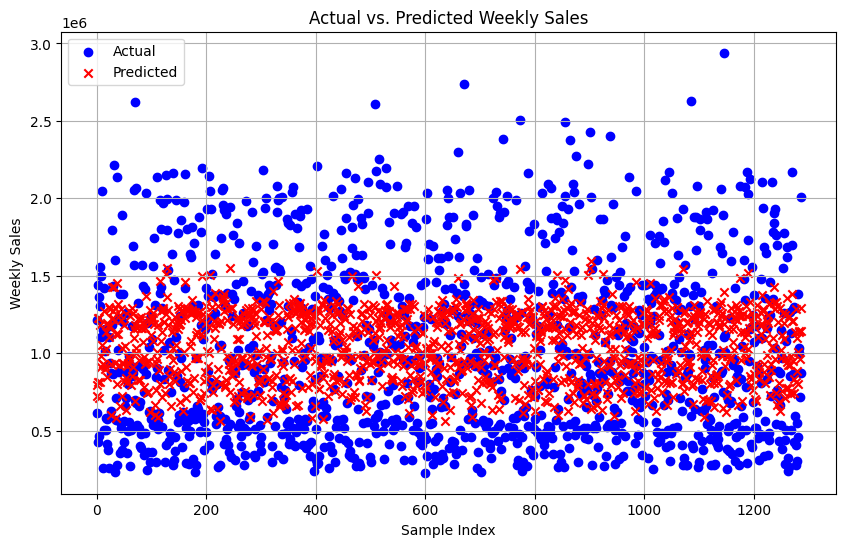

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Visualize the results of linear regression here
results_linear_regression = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
plt.scatter(results_linear_regression.index, results_linear_regression['Actual'], label='Actual', color='blue', marker='o')
plt.scatter(results_linear_regression.index, results_linear_regression['Predicted'], label='Predicted', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.title('Actual vs. Predicted Weekly Sales')
plt.grid(True)
plt.show()


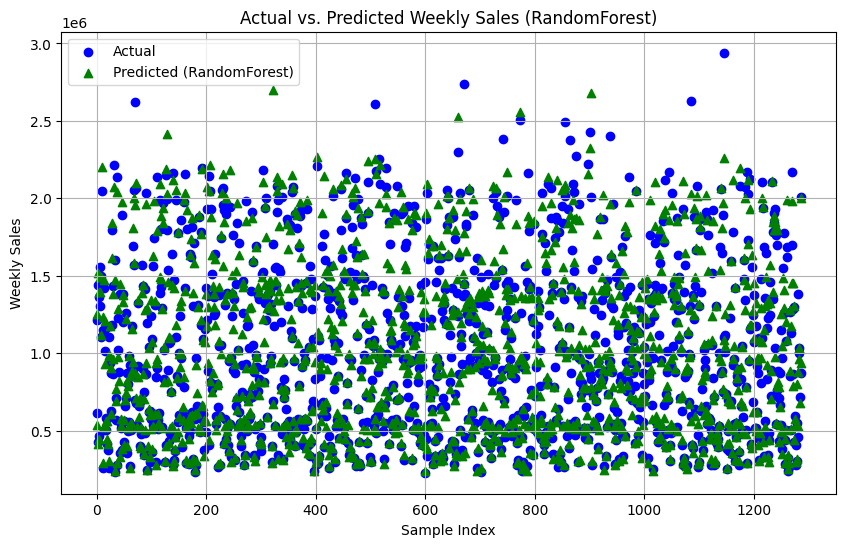

In [39]:
#Visualize the results with random forest regression here
results_rand_forest = pd.DataFrame({'Actual': y_test, 'Predicted (RandomForest)': y_pred_rand_forest})

plt.figure(figsize=(10, 6))
plt.scatter(results_rand_forest.index, results_rand_forest['Actual'], label='Actual', color='blue', marker='o')
plt.scatter(results_rand_forest.index, results_rand_forest['Predicted (RandomForest)'], label='Predicted (RandomForest)', color='green', marker='^')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.title('Actual vs. Predicted Weekly Sales (RandomForest)')
plt.grid(True)
plt.show()

In [40]:
"""
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
ax1.set_xlabel("Data Point")
ax1.set_ylabel("Actual Weekly Sales")
ax1.set_title("Actual Weekly Sales")

ax2.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
ax2.set_xlabel("Data Point")
ax2.set_ylabel("Predicted Weekly Sales")
ax2.set_title("Predicted Weekly Sales")

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()
"""


'\nimport matplotlib.pyplot as plt\n\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))\n\nax1.scatter(range(len(y_test)), y_test, color=\'blue\', label=\'Actual\')\nax1.set_xlabel("Data Point")\nax1.set_ylabel("Actual Weekly Sales")\nax1.set_title("Actual Weekly Sales")\n\nax2.scatter(range(len(y_pred)), y_pred, color=\'red\', label=\'Predicted\')\nax2.set_xlabel("Data Point")\nax2.set_ylabel("Predicted Weekly Sales")\nax2.set_title("Predicted Weekly Sales")\n\nax1.legend()\nax2.legend()\n\nplt.tight_layout()\nplt.show()\n'